In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd

In [14]:
# cargar el DataFrame transformado
file_path = Path('../data/processed/Ventas_Transformadas.parquet')
df_ventas_pl = pl.read_parquet(file_path)

In [20]:
df_ventas_pd = df_ventas_pl.to_pandas()
numeric_cols = ['cantidad', 'precio_unitario', 'valor_total_venta']
correlation_matrix = df_ventas_pd[numeric_cols].corr()

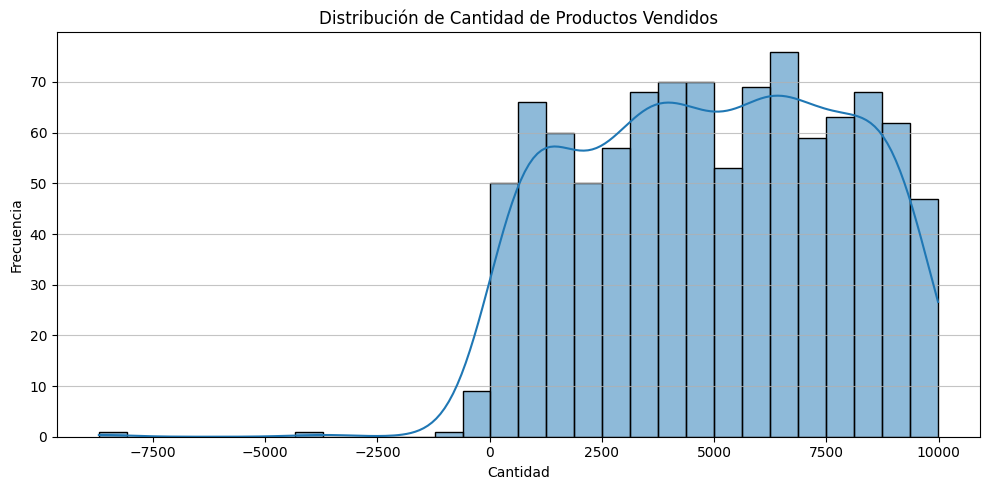

In [8]:
# Distribución de 'cantidad'
plt.figure(figsize=(10, 5))
sns.histplot(df_ventas_pd['cantidad'], bins=len(df_ventas_pd['cantidad'].unique()) if len(df_ventas_pd['cantidad'].unique()) < 50 else 30, kde=True)
plt.title('Distribución de Cantidad de Productos Vendidos')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

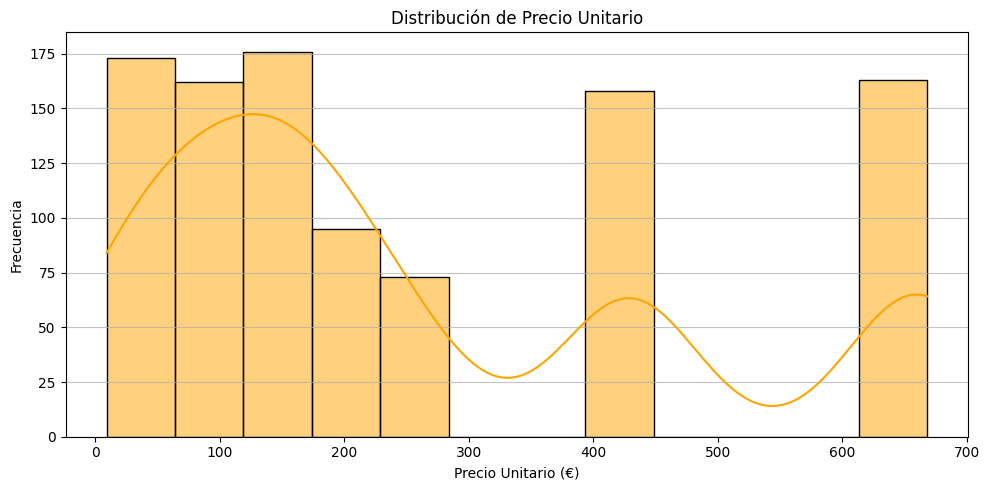

In [9]:
# Distribución de 'precio_unitario'
plt.figure(figsize=(10, 5))
sns.histplot(df_ventas_pd['precio_unitario'], bins=len(df_ventas_pd['precio_unitario'].unique()) if len(df_ventas_pd['precio_unitario'].unique()) < 50 else 30, kde=True, color='orange')
plt.title('Distribución de Precio Unitario')
plt.xlabel('Precio Unitario (€)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

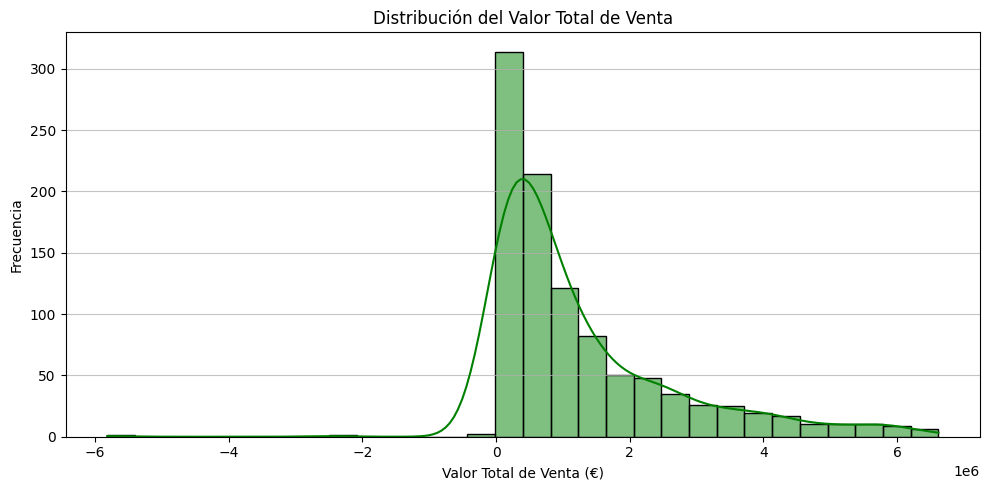

In [16]:
# Distribución de 'valor_total_venta'
plt.figure(figsize=(10, 5))
sns.histplot(df_ventas_pd['valor_total_venta'], bins=len(df_ventas_pd['valor_total_venta'].unique()) if len(df_ventas_pd['valor_total_venta'].unique()) < 50 else 30, kde=True, color='green')
plt.title('Distribución del Valor Total de Venta')
plt.xlabel('Valor Total de Venta (€)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


C:\Users\Diego\AppData\Local\Temp\ipykernel_6880\1808427527.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='producto', data=df_ventas_pd, order=df_ventas_pd['producto'].value_counts().index, palette='viridis')


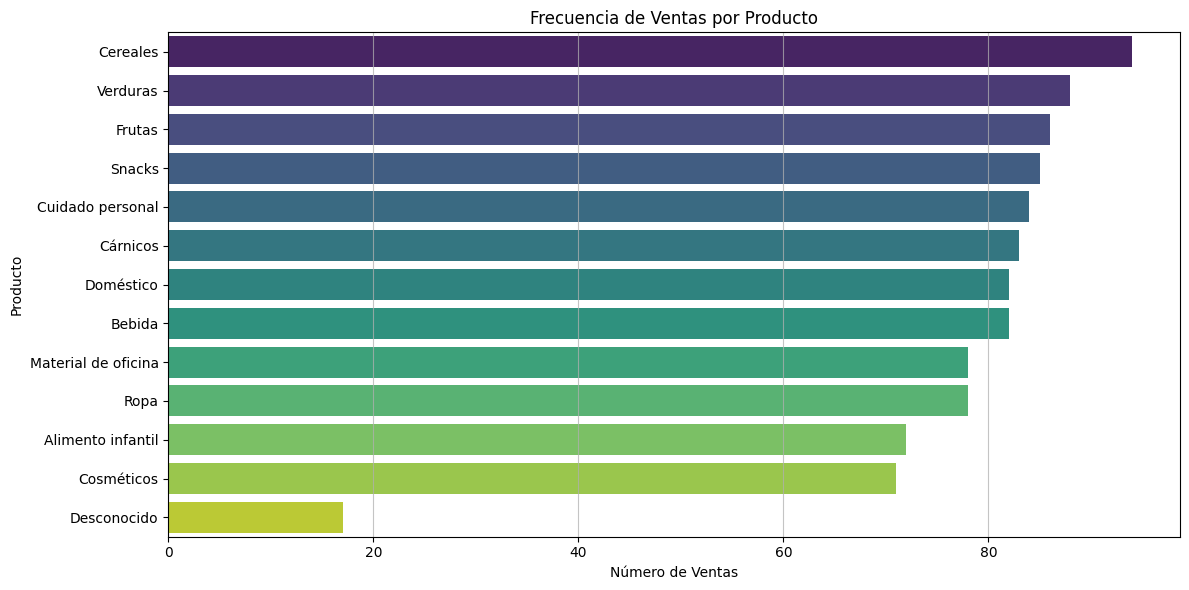

In [17]:
# Distribución de ventas por 'producto' (gráfico de barras)
plt.figure(figsize=(12, 6))
# Para el orden, Polars: df_ventas_pl.group_by('producto').agg(pl.count().alias('count')).sort('count', descending=True).select('producto').to_series().to_list()
sns.countplot(y='producto', data=df_ventas_pd, order=df_ventas_pd['producto'].value_counts().index, palette='viridis')
plt.title('Frecuencia de Ventas por Producto')
plt.xlabel('Número de Ventas')
plt.ylabel('Producto')
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

C:\Users\Diego\AppData\Local\Temp\ipykernel_6880\1754794752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df_ventas_pd, order=df_ventas_pd['region'].value_counts().index, palette='plasma')


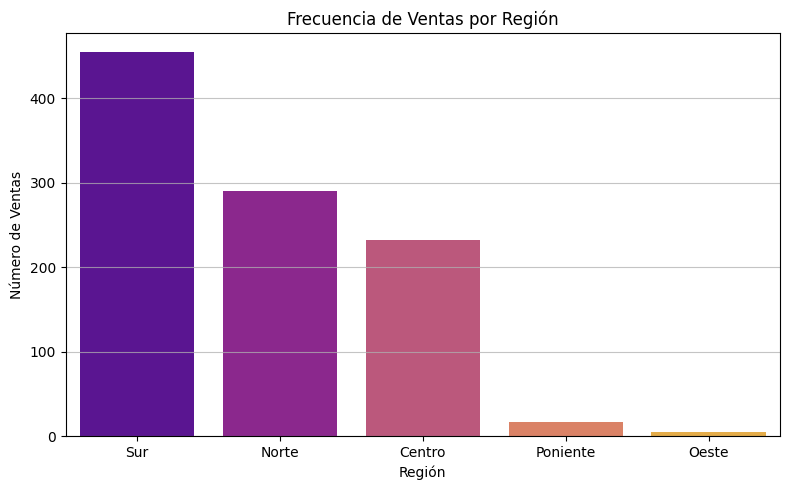

In [18]:
# Distribución de ventas por 'region' (gráfico de barras)
plt.figure(figsize=(8, 5))
sns.countplot(x='region', data=df_ventas_pd, order=df_ventas_pd['region'].value_counts().index, palette='plasma')
plt.title('Frecuencia de Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Número de Ventas')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

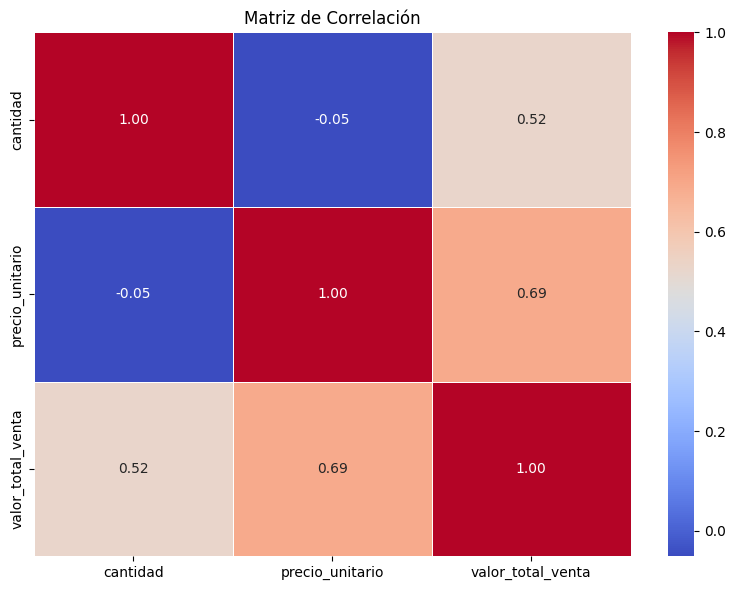

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

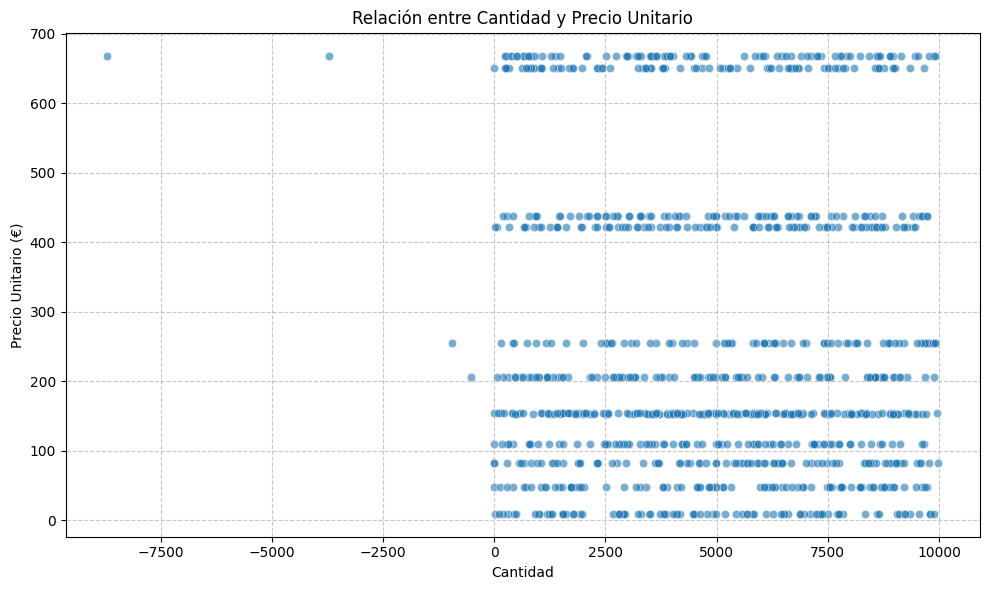

In [ ]:
# Gráficos de dispersión para identificar relaciones entre pares de variables
# Relación entre Cantidad y Precio Unitario
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cantidad', y='precio_unitario', data=df_ventas_pd, alpha=0.6)
plt.title('Relación entre Cantidad y Precio Unitario')
plt.xlabel('Cantidad')
plt.ylabel('Precio Unitario (€)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Diego\AppData\Local\Temp\ipykernel_6880\2451734840.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='valor_total_venta', data=df_ventas_pd, palette='viridis')


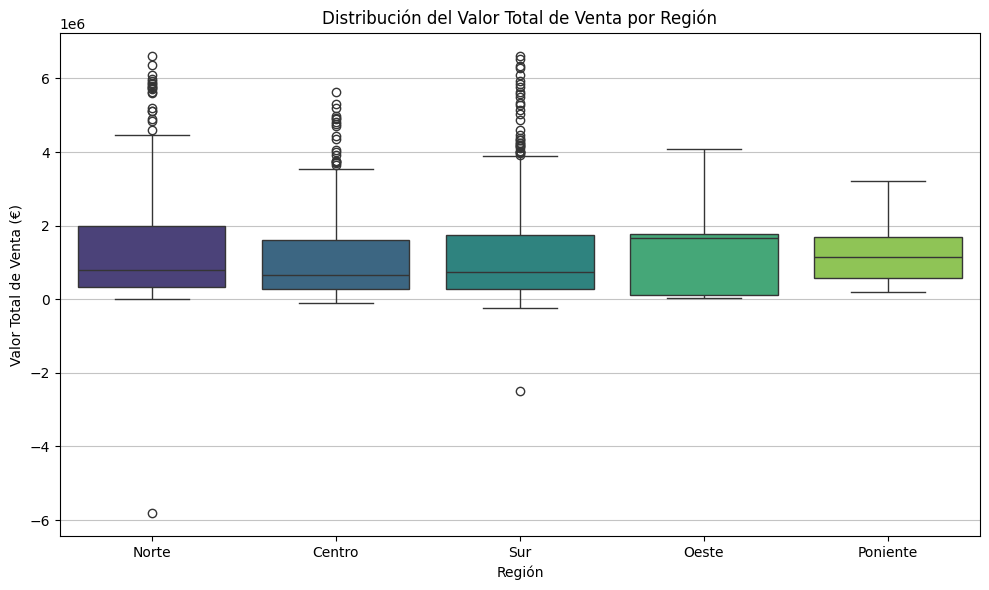

In [23]:
# Gráficos de cajas (box plots) para comparar distribuciones entre categorías
# Distribución de Valor Total de Venta por Región
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='valor_total_venta', data=df_ventas_pd, palette='viridis')
plt.title('Distribución del Valor Total de Venta por Región')
plt.xlabel('Región')
plt.ylabel('Valor Total de Venta (€)')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


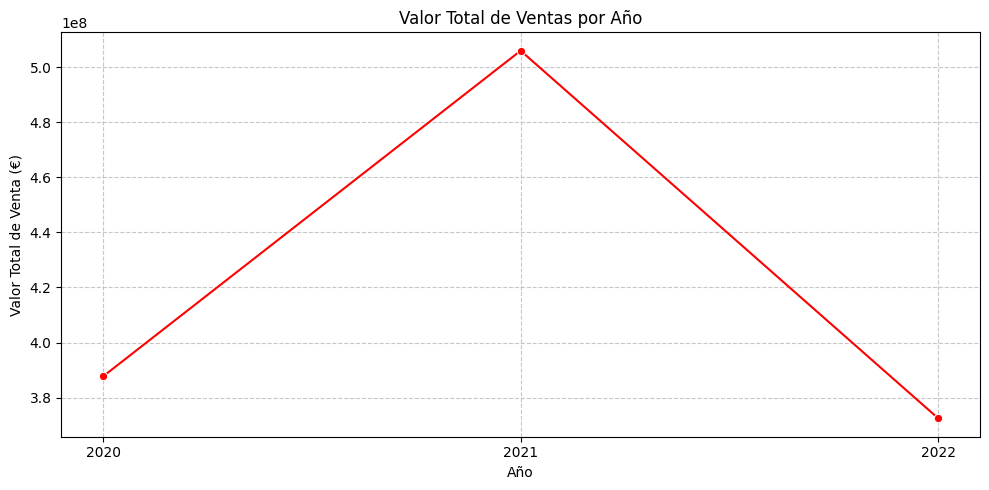

In [24]:
# Análisis de Ventas a lo largo del tiempo (por año y mes)
# Ventas totales por año
# En Polars: ventas_por_año_pl = df_ventas_pl.group_by('año_venta').agg(pl.sum('valor_total_venta').alias('total_ventas')).sort('año_venta')
ventas_por_año = df_ventas_pd.groupby('año_venta')['valor_total_venta'].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=ventas_por_año.index, y=ventas_por_año.values, marker='o', color='red')
plt.title('Valor Total de Ventas por Año')
plt.xlabel('Año')
plt.ylabel('Valor Total de Venta (€)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ventas_por_año.index)
plt.tight_layout()
plt.show()

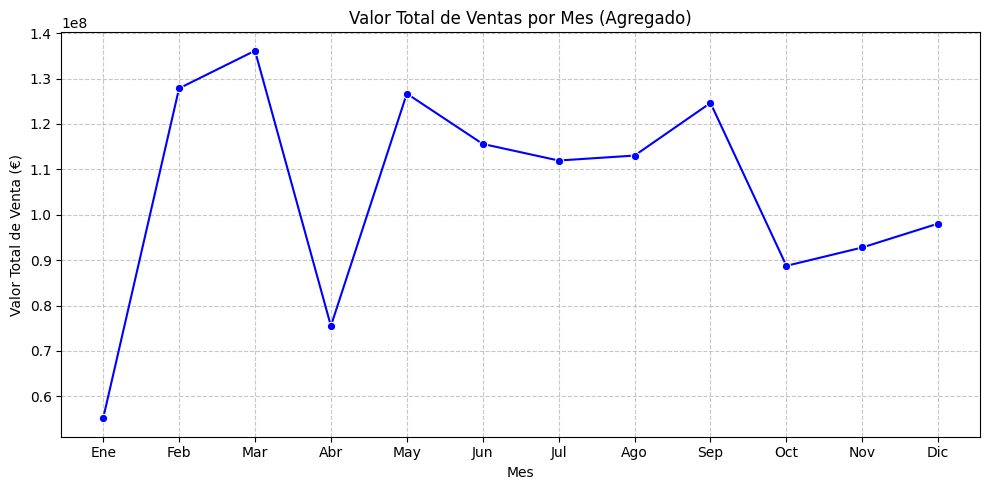

In [25]:
# Ventas totales por mes (agregando todos los años)
# En Polars: ventas_por_mes_pl = df_ventas_pl.group_by('mes_venta').agg(pl.sum('valor_total_venta').alias('total_ventas')).sort('mes_venta')
ventas_por_mes = df_ventas_pd.groupby('mes_venta')['valor_total_venta'].sum().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=ventas_por_mes.index, y=ventas_por_mes.values, marker='o', color='blue')
plt.title('Valor Total de Ventas por Mes (Agregado)')
plt.xlabel('Mes')
plt.ylabel('Valor Total de Venta (€)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()
plt.show()

C:\Users\Diego\AppData\Local\Temp\ipykernel_6880\3947706627.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_by_region = top_products_by_region.groupby('region').apply(lambda x: x.nlargest(5, 'valor_total_venta')).reset_index(drop=True)


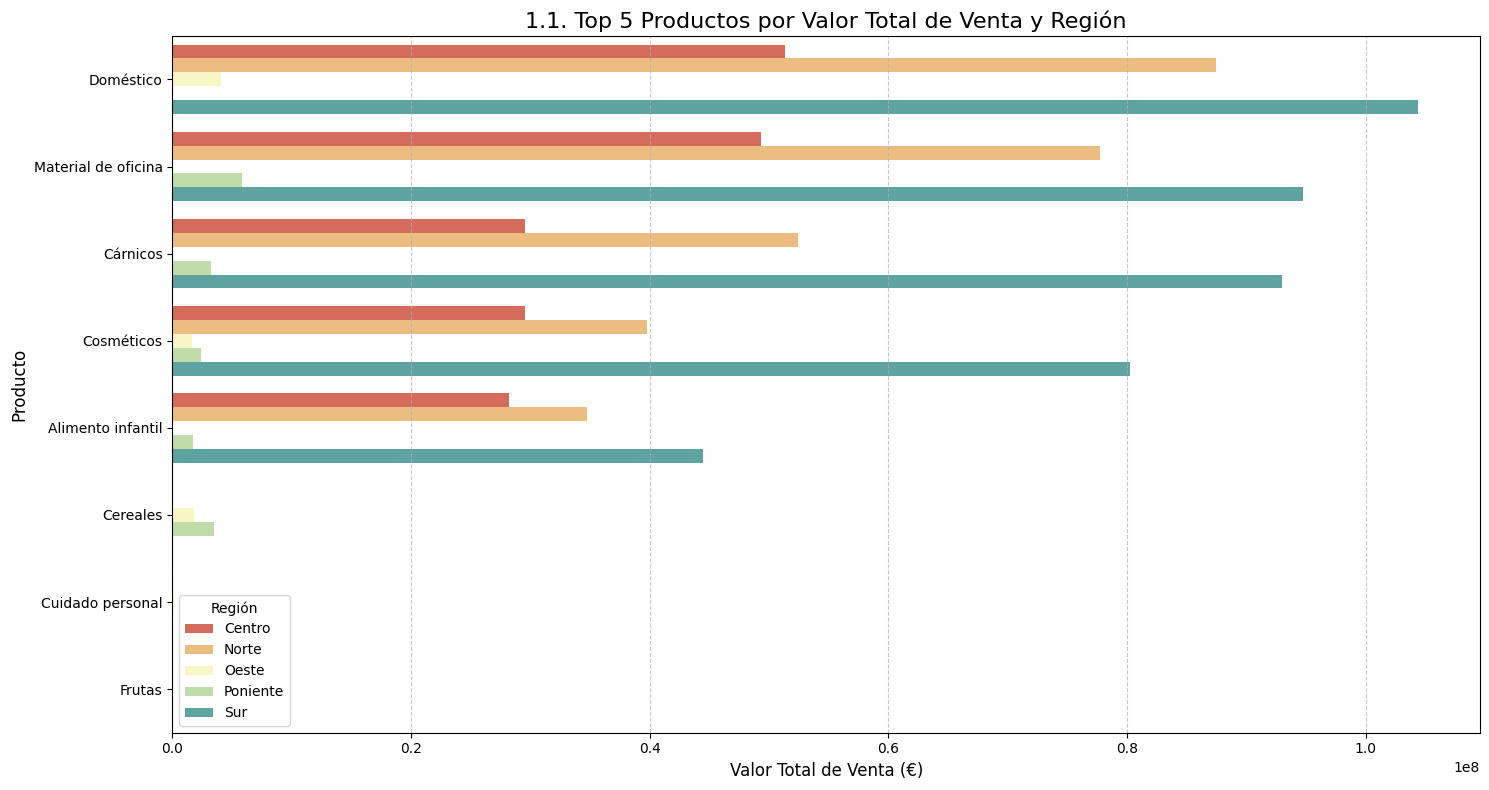

In [26]:
# Agrupar por región y producto, sumar valor_total_venta y obtener los top 5 por región
top_products_by_region = df_ventas_pd.groupby(['region', 'producto'])['valor_total_venta'].sum().reset_index()
top_5_by_region = top_products_by_region.groupby('region').apply(lambda x: x.nlargest(5, 'valor_total_venta')).reset_index(drop=True)
plt.figure(figsize=(15, 8))
sns.barplot(
    x='valor_total_venta',
    y='producto',
    hue='region',
    data=top_5_by_region.sort_values(by=['region', 'valor_total_venta'], ascending=[True, False]),
    palette='Spectral'
)
plt.title('1.1. Top 5 Productos por Valor Total de Venta y Región', fontsize=16)
plt.xlabel('Valor Total de Venta (€)', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Región')
plt.tight_layout()
plt.show()


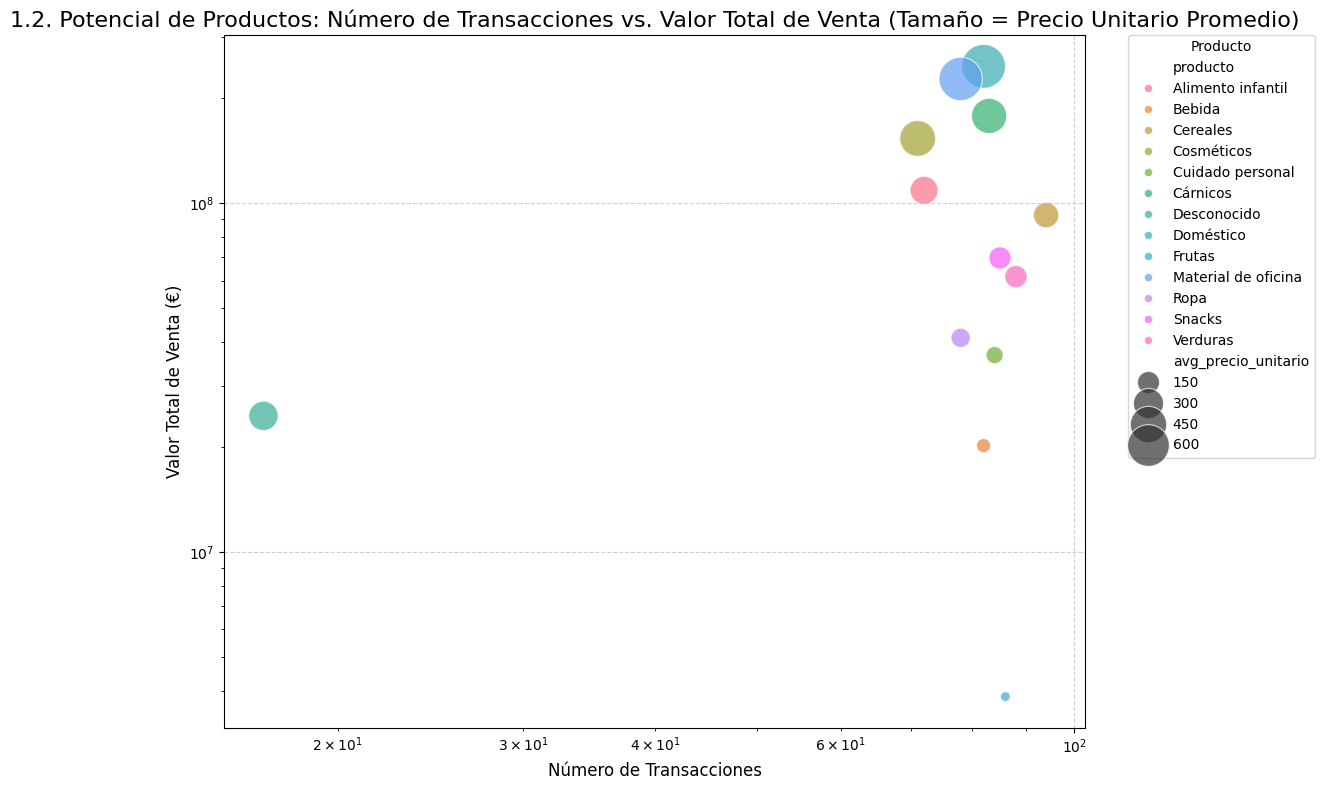

In [27]:
# Productos infravalorados con potencial de crecimiento:
# Esto es más complejo y requiere un análisis heurístico o modelos predictivos.
# Una aproximación inicial podría ser buscar productos con alta 'cantidad' pero bajo 'precio_unitario'
# o productos con un crecimiento reciente significativo en ventas donde antes eran bajos.
# Para este EDA, podríamos visualizar productos con baja venta total pero con un volumen de transacciones decente.

# Calcular el número de transacciones por producto
transactions_per_product = df_ventas_pd['producto'].value_counts().reset_index()
transactions_per_product.columns = ['producto', 'num_transactions']

# Unir con el valor total de ventas por producto
product_performance = df_ventas_pd.groupby('producto')['valor_total_venta'].sum().reset_index()
product_performance = product_performance.merge(transactions_per_product, on='producto')

# Crear un 'bubble chart' o 'scatter plot' para visualizar relación entre valor total, número de transacciones y, si es posible, precio unitario promedio
# Precio unitario promedio por producto
avg_price_per_product = df_ventas_pd.groupby('producto')['precio_unitario'].mean().reset_index()
avg_price_per_product.rename(columns={'precio_unitario': 'avg_precio_unitario'}, inplace=True)
product_performance = product_performance.merge(avg_price_per_product, on='producto')

plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='num_transactions',
    y='valor_total_venta',
    size='avg_precio_unitario', # El tamaño de la burbuja representa el precio unitario promedio
    hue='producto',
    data=product_performance,
    sizes=(50, 1000), # Rango de tamaños para las burbujas
    alpha=0.7
)
plt.title('1.2. Potencial de Productos: Número de Transacciones vs. Valor Total de Venta (Tamaño = Precio Unitario Promedio)', fontsize=16)
plt.xlabel('Número de Transacciones', fontsize=12)
plt.ylabel('Valor Total de Venta (€)', fontsize=12)
plt.xscale('log') # Escala logarítmica para num_transactions si hay mucha variación
plt.yscale('log') # Escala logarítmica para valor_total_venta si hay mucha variación
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajustar layout para la leyenda
plt.show()

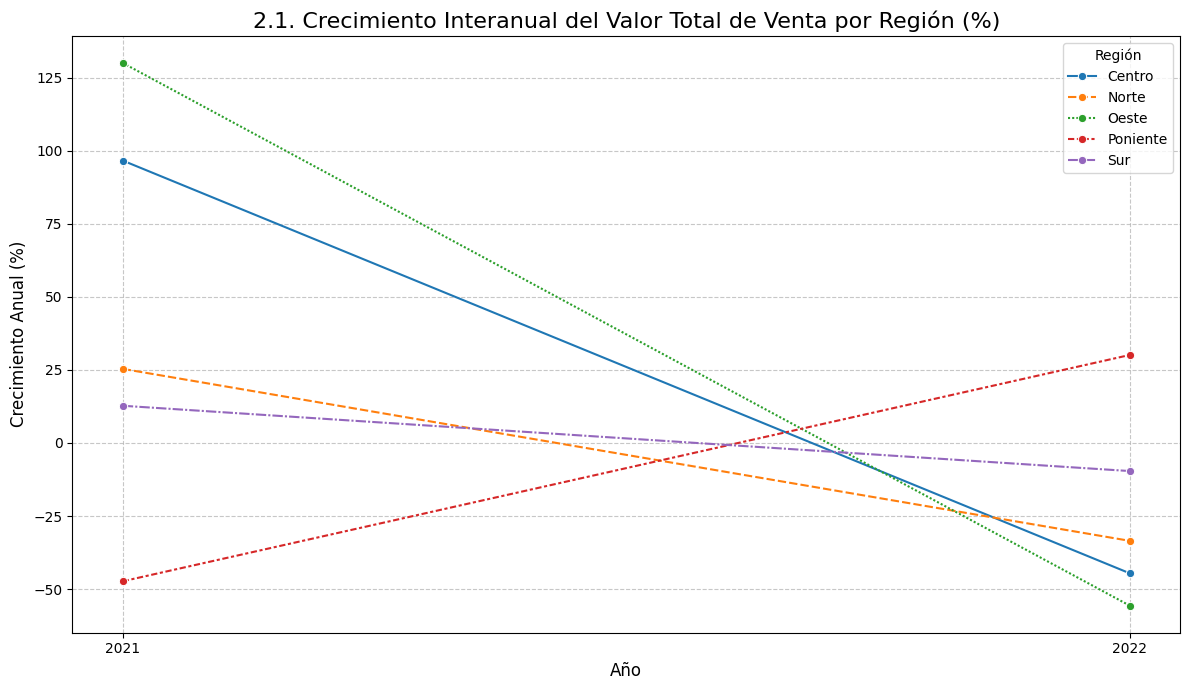

In [28]:
# Crecimiento interanual por región
# Requiere al menos dos años de datos.
# Agrupar por año y región, y calcular el valor total de ventas
sales_by_year_region = df_ventas_pd.groupby(['año_venta', 'region'])['valor_total_venta'].sum().reset_index()

# Pivotar para calcular el crecimiento interanual
sales_pivot = sales_by_year_region.pivot(index='año_venta', columns='region', values='valor_total_venta')
growth_rates = sales_pivot.pct_change() * 100 # Porcentaje de cambio
growth_rates.dropna(inplace=True) # Eliminar el primer año (no hay crecimiento previo)

if not growth_rates.empty:
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=growth_rates, marker='o')
    plt.title('2.1. Crecimiento Interanual del Valor Total de Venta por Región (%)', fontsize=16)
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Crecimiento Anual (%)', fontsize=12)
    plt.xticks(growth_rates.index)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Región')
    plt.tight_layout()
    plt.show()

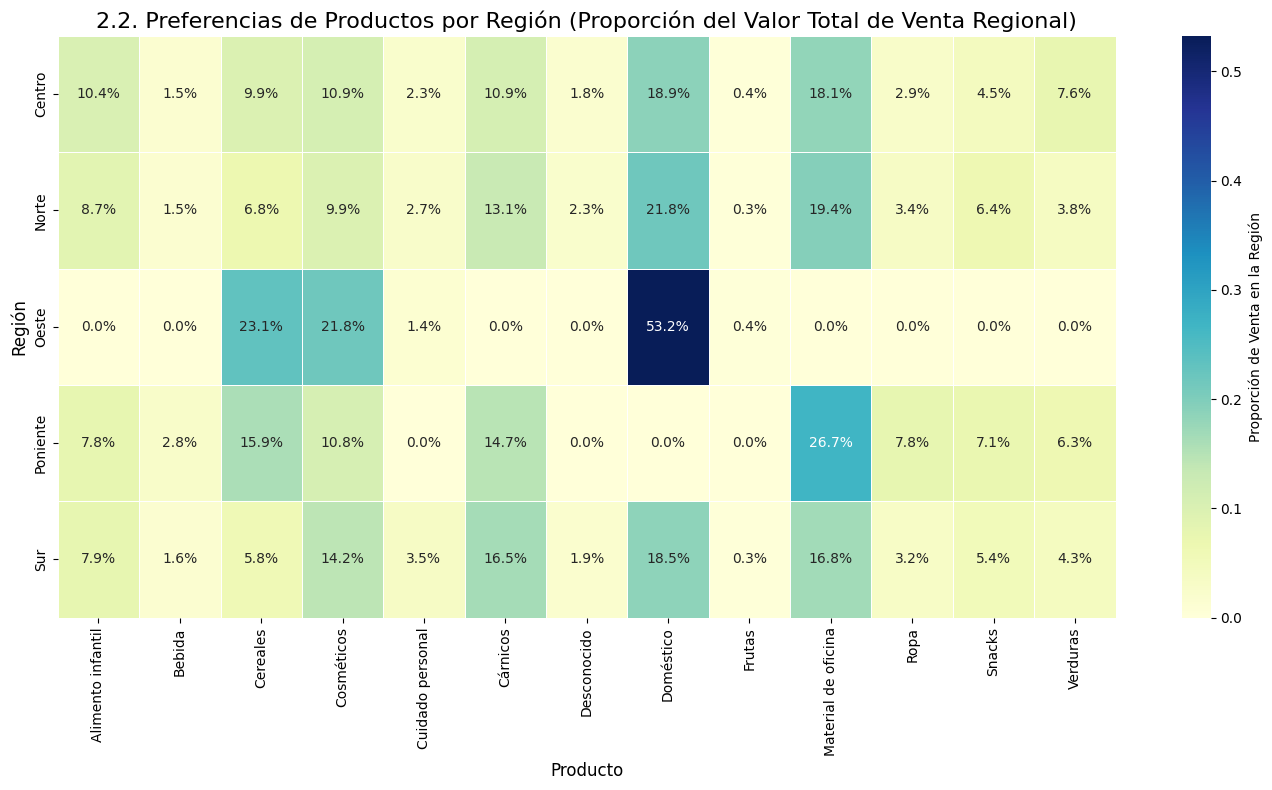

In [29]:
# Variación de preferencias de productos entre Norte/Centro/Sur
# Utilizaremos un heatmap de la proporción de ventas por producto y región.

# Calcular el valor total de ventas por producto y región
product_region_sales = df_ventas_pd.groupby(['region', 'producto'])['valor_total_venta'].sum().unstack(fill_value=0)

# Calcular la proporción de cada producto dentro de su región
# Dividir cada valor por la suma total de ventas de esa región
product_region_proportion = product_region_sales.apply(lambda x: x / x.sum(), axis=1)

plt.figure(figsize=(14, 8))
sns.heatmap(
    product_region_proportion,
    annot=True,
    fmt=".1%", # Formato en porcentaje
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={'label': 'Proporción de Venta en la Región'}
)
plt.title('2.2. Preferencias de Productos por Región (Proporción del Valor Total de Venta Regional)', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Región', fontsize=12)
plt.tight_layout()
plt.show()

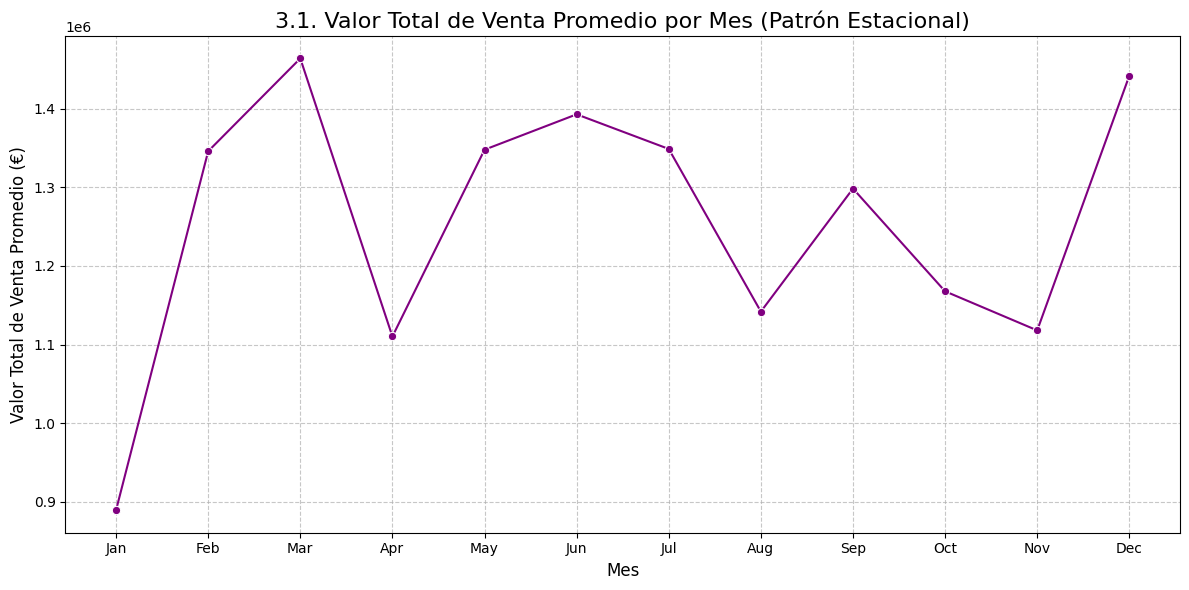

In [30]:
# Picos estacionales predecibles (valor total de venta por mes)
# Agrupar por mes (promedio de todos los años para ver el patrón estacional general)
monthly_avg_sales = df_ventas_pd.groupby('mes_venta')['valor_total_venta'].mean().reset_index()
monthly_avg_sales['mes_nombre'] = monthly_avg_sales['mes_venta'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))

# Ordenar los meses correctamente
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg_sales['mes_nombre'] = pd.Categorical(monthly_avg_sales['mes_nombre'], categories=[pd.to_datetime(str(i), format='%m').strftime('%b') for i in range(1,13)], ordered=True)
monthly_avg_sales = monthly_avg_sales.sort_values('mes_nombre')

plt.figure(figsize=(12, 6))
sns.lineplot(x='mes_nombre', y='valor_total_venta', data=monthly_avg_sales, marker='o', color='purple')
plt.title('3.1. Valor Total de Venta Promedio por Mes (Patrón Estacional)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Valor Total de Venta Promedio (€)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

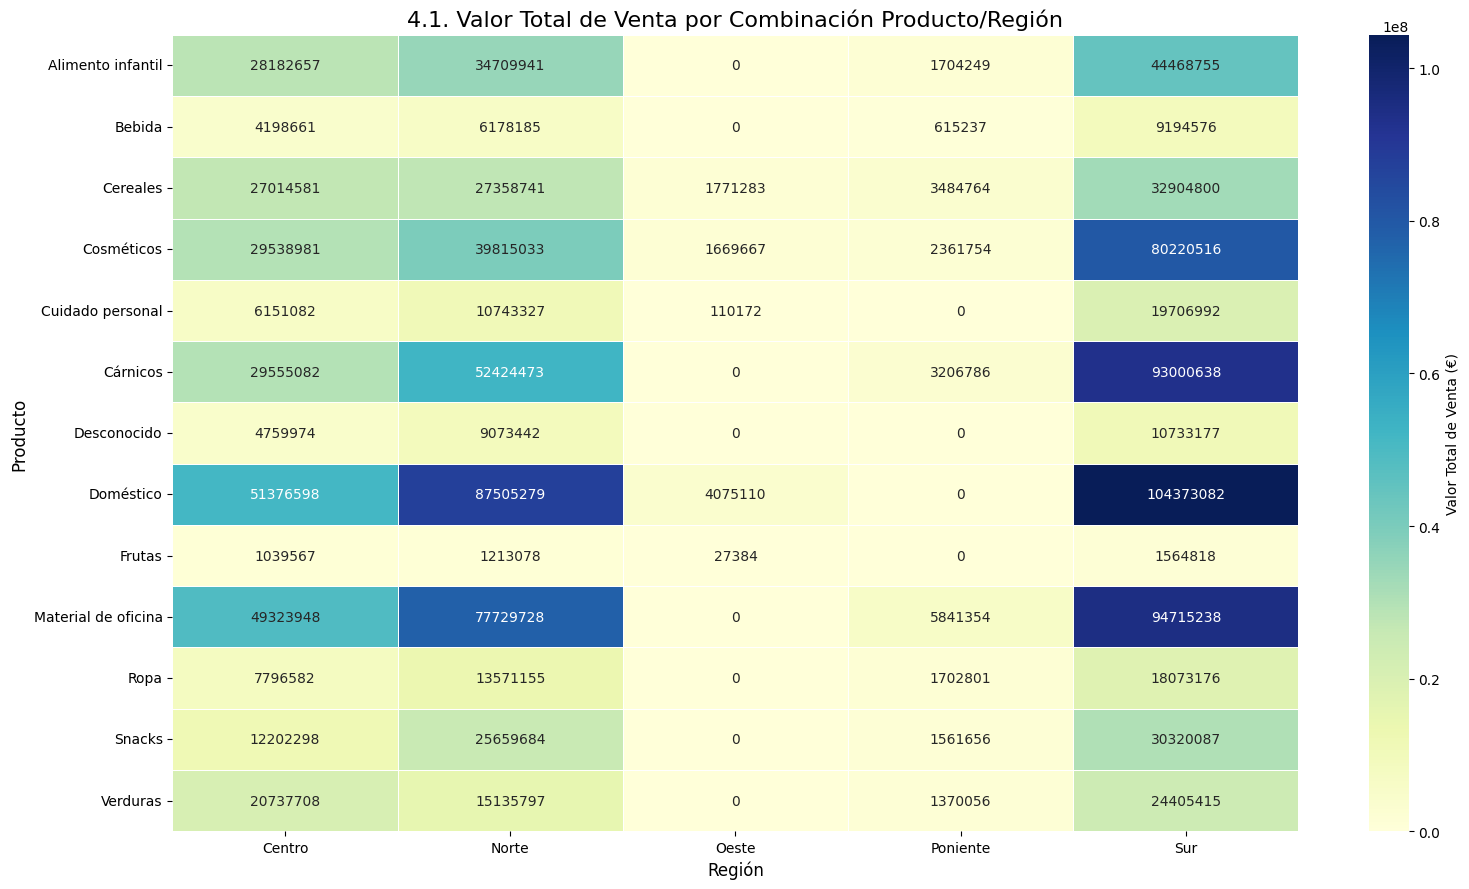

In [32]:
# Agrupar por producto y región, sumar valor_total_venta
product_region_value = df_ventas_pd.groupby(['producto', 'region'])['valor_total_venta'].sum().unstack(fill_value=0)

plt.figure(figsize=(16, 9))
sns.heatmap(
    product_region_value,
    annot=True,
    fmt=".0f", # Sin decimales
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={'label': 'Valor Total de Venta (€)'}
)
plt.title('4.1. Valor Total de Venta por Combinación Producto/Región', fontsize=16)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.tight_layout()
plt.show()

<Axes: xlabel='fecha_orden', ylabel='valor_total_venta'>

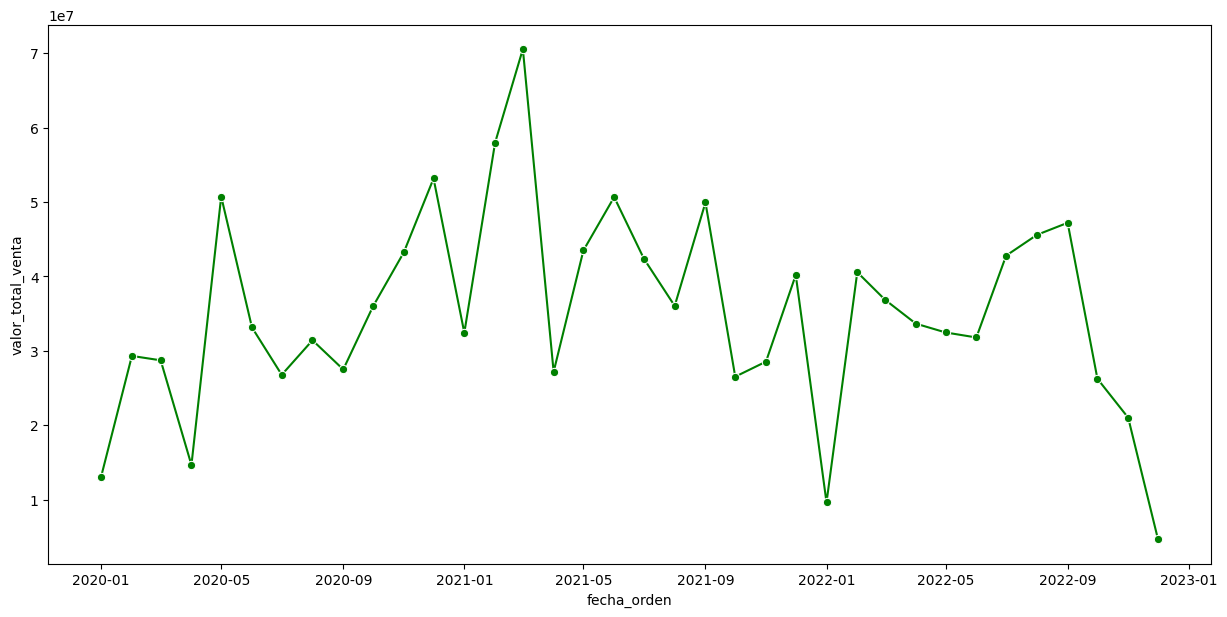

In [33]:
# Ventas por mes (incluyendo el año para ver la tendencia a lo largo del tiempo)
df_ventas_pd['año_mes'] = df_ventas_pd['fecha_venta'].dt.to_period('M').astype(str)
sales_over_time = df_ventas_pd.groupby('año_mes')['valor_total_venta'].sum().reset_index()
sales_over_time['fecha_orden'] = pd.to_datetime(sales_over_time['año_mes']) # Para ordenar correctamente en el plot
sales_over_time = sales_over_time.sort_values('fecha_orden')

plt.figure(figsize=(15, 7))
sns.lineplot(x='fecha_orden', y='valor_total_venta', data=sales_over_time, marker='o', color='green')
